0
correct


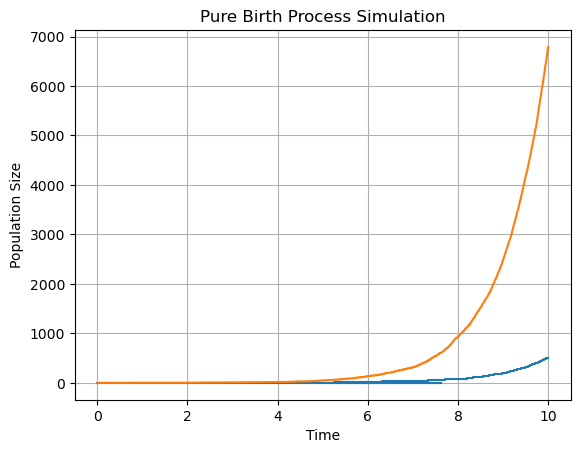

expected mutant =  506.0
theory expected mutant =  22.026465794806718
variance mutant =  0.0
theory variance mutant =  97033.03908195806


In [46]:
#continuous time

# This shows the simulation for spontaneous mutation. We have population of cell. It grows until max_time. 
# The mutation occurs and we add phage at the max_time.

import numpy as np
import matplotlib.pyplot as plt

def yule_process_spontaneous(cell_division_rate, mutation_rate, max_time, initial_population):

    time = 0
    mtime = 0
    mutant = 0
    population = initial_population
    times = [time]
    populations = [population]
    mutants = [0]
    mtimes = [mtime]
    
    mutation_max = mutation_rate*max_time
    
    while time < max_time:
        # generate random time with rate n*cell division rate
        next_time = np.random.exponential(1/(population*cell_division_rate))
        time += next_time
        population += 1
        mutation_prob = mutation_rate*next_time
        #print(mutation_prob/ mutation_max)
        if np.random.uniform(0, 1) < mutation_prob/ mutation_max:
            print("correct")
            mutant += 1
            mutants.append(mutant)
            mtimes.append(time)
        if mutant != 0:
            while mtime < time:
                mnext_time = np.random.exponential(1/(mutant*cell_division_rate))
                #print(mnext_time)
                mtime += mnext_time
                mutant += 1
                mutants.append(mutant)
                mtimes.append(mtime)
        populations.append(population)
        times.append(time)
        
    return times, populations, mutants, mtimes

cell_division_rate = 1
max_time = 10
mutation_rate = 10**(-4)
initial_population = 1

total_pop = []

pop = []
mut = []
tot_mut = []

for j in range(1):
    print(j)
    times, populations, mutants, mtimes = yule_process_spontaneous(cell_division_rate, mutation_rate, max_time, initial_population)
    tot_mut.append(mutants[-1])
    #print(mtimes, mutants)
    plt.step(mtimes, mutants)

plt.step(times, populations)
#plt.step(mtimes, mutants)
plt.title("Pure Birth Process Simulation")
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.grid(True)

plt.show()


print("expected mutant = ", np.mean(tot_mut))
em = mutation_rate*max_time*np.exp(cell_division_rate*max_time)
print("theory expected mutant = ", em)
print("variance mutant = ", np.var(tot_mut))
print("theory variance mutant = ", 2*np.exp(cell_division_rate*max_time)*em/(cell_division_rate*max_time))

# model 2

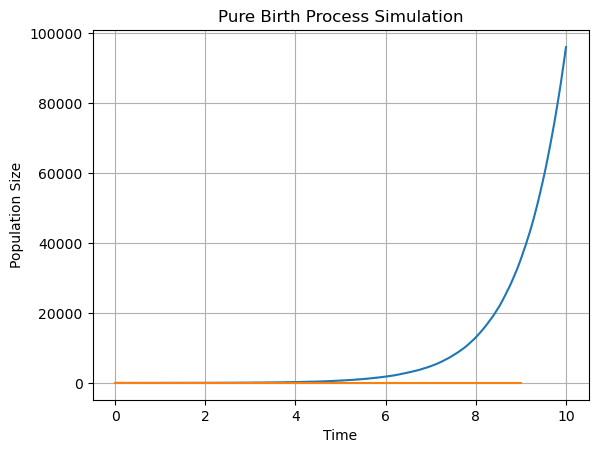

expected mutant =  10.03990351144713
theory expected mutant =  22.026465794806718
variance mutant =  111.88973379999234
theory variance mutant =  97033.03908195806


In [48]:
#continuous time

# This shows the simulation for spontaneous mutation. We have population of cell. It grows until max_time. 
# The mutation occurs and we add phage at the max_time.

import numpy as np
import matplotlib.pyplot as plt

def yule_process_spontaneous(cell_division_rate, mutation_rate, max_time, initial_population):

    time = 0
    mtime = 0
    mutant = 0
    population = initial_population
    times = [time]
    populations = [population]
    mutants = [0]
    mtimes = [mtime]
    
    mutation_max = mutation_rate*max_time
    
    while time < max_time:
        # generate random time with rate n*cell division rate
        next_time = np.random.exponential(1/(population*cell_division_rate))
        time += next_time
        population += 1
        mutation_prob = mutation_rate*next_time
        #print(mutation_prob/ mutation_max)
        if np.random.uniform(0, 1) < mutation_prob/ mutation_max:
            #print("correct")
            mutants.append(1)
            mtimes.append(time)
        populations.append(population)
        times.append(time)
        
    return times, populations, mutants, mtimes

def yule_for_mutant(cell_division_rate, time, mutant, max_time):
    times = [time]
    mutants = [mutant]
    while time < max_time:
        # generate random time with rate mutant*cell division rate
        next_time = np.random.exponential(1/(mutant*cell_division_rate))
        time += next_time
        mutant += 1
        times.append(time)
        mutants.append(mutant)
    return times, mutants


cell_division_rate = 1
max_time = 10
mutation_rate = 10**(-4)
initial_population = 1

total_pop = []

pop = []
mut = []
manysim_mutant = []

for j in range(30):
    #print(j)
    times, populations, mutants, mtimes = yule_process_spontaneous(cell_division_rate, mutation_rate, max_time, initial_population)
    tot_mut = 0
    for i in range(1,len(mutants)):
        mmutants, mmtimes = yule_for_mutant(cell_division_rate, mtimes[i], mutants[i], max_time)
        tot_mut += mmutants[-1]
    manysim_mutant.append(tot_mut)

plt.step(times, populations)
plt.step(mtimes, mutants)
plt.title("Pure Birth Process Simulation")
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.grid(True)

plt.show()


print("expected mutant = ", np.mean(manysim_mutant))
em = mutation_rate*max_time*np.exp(cell_division_rate*max_time)
print("theory expected mutant = ", em)
print("variance mutant = ", np.var(manysim_mutant))
print("theory variance mutant = ", 2*np.exp(cell_division_rate*max_time)*em/(cell_division_rate*max_time))